Dataset : '/movies.sqlite'

# importing the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

1. connect your database -> sqlite3.connect(database)
2. use the cursor function -> database_variable.cursor()


Workflow
1. you need to establish a connection to sqlite database
2. then, you have to create a cursor object using the cursor function
3. then, execute the query -> cursor_object.execute('query')
4. to fetch the data from the database the use fetchall() of cursor object

## 1. establish a connection to sqlite database

In [2]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/priy998/imdbsqlitedataset")


Skipping, found downloaded files in ".\imdbsqlitedataset" (use force=True to force download)


In [3]:

db = 'imdbsqlitedataset/movie.sqlite'
conn = sqlite3.connect(db)
cur = conn.cursor()

## 2. get all the data aboyut the movies?

In [4]:
cur.execute("SELECT * FROM movies")
movies = cur.fetchall()

In [5]:
movie_df = pd.DataFrame(movies,
                        columns=['id', 'original_title', 'budget', 'popularity', 'release_date', 'revenue', 'title',
                                 'vote_average', 'vote_count', 'overview', 'tagline', 'uid', 'director_id'])

In [6]:
movie_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,48395,El Mariachi,220000,14,1992-09-04,2040920,El Mariachi,6.6,238,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",9367,5097
4769,48396,Newlyweds,9000,0,2011-12-26,0,Newlyweds,5.9,5,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,72766,6485
4770,48397,"Signed, Sealed, Delivered",0,1,2013-10-13,0,"Signed, Sealed, Delivered",7.0,6,"""Signed, Sealed, Delivered"" introduces a dedic...",None,231617,7108
4771,48398,Shanghai Calling,0,0,2012-05-03,0,Shanghai Calling,5.7,7,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,126186,7109


In [7]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4773 non-null   int64  
 1   original_title  4773 non-null   object 
 2   budget          4773 non-null   int64  
 3   popularity      4773 non-null   int64  
 4   release_date    4773 non-null   object 
 5   revenue         4773 non-null   int64  
 6   title           4773 non-null   object 
 7   vote_average    4773 non-null   float64
 8   vote_count      4773 non-null   int64  
 9   overview        4770 non-null   object 
 10  tagline         3951 non-null   object 
 11  uid             4773 non-null   int64  
 12  director_id     4773 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 484.9+ KB


## 3. Get all the data about directors?

In [8]:
cur.execute("SELECT * FROM directors")
directors = cur.fetchall()

In [9]:
directors_df = pd.DataFrame(directors, columns=['name', 'id', 'gender', 'uid', 'department'])

In [10]:
directors_df.head()

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing


## 4. Check how many movies are present in IMDB table

In [11]:
cur.execute('SELECT COUNT(TITLE) FROM movies')
count = cur.fetchall()

In [12]:
print(f"Number of the movies present in IMDB database is {count[0]}")

Number of the movies present in IMDB database is (4773,)


## 5. Find these 3 directors: James cameron, luc Besson, John Woo

In [13]:
cur.execute('select * from directors where name in ("James Cameron", "Luc Besson", "John Woo")')
three_directors = cur.fetchall()

In [14]:
print(f'these three directors data are : {three_directors}')

these three directors data are : [('James Cameron', 4762, 2, 2710, 'Directing'), ('John Woo', 4893, 2, 11401, 'Directing'), ('Luc Besson', 4949, 2, 59, 'Directing')]


## 6. Find all the directors with name starting with "Steven"

In [15]:
cur.execute('select * from directors where name like "Steven%"')
name_like = cur.fetchall()

In [16]:
print(f"The directors whose names are starting with the word 'Steven' are  : {name_like}")

The directors whose names are starting with the word 'Steven' are  : [('Steven Spielberg', 4799, 2, 488, 'Directing'), ('Steven Soderbergh', 4909, 2, 1884, 'Directing'), ('Steven Brill', 5013, 2, 32593, 'Directing'), ('Steven Zaillian', 5117, 2, 2260, 'Directing'), ('Steven Quale', 5216, 2, 93214, 'Directing'), ('Steven Seagal', 5221, 2, 23880, 'Directing'), ('Steven E. de Souza', 5390, 2, 1726, 'Directing'), ('Steven Shainberg', 5803, 2, 67795, 'Directing'), ('Steven R. Monroe', 6713, 2, 88039, 'Directing')]


## 7. Count the female directors

In [17]:
cur.execute('select count(id) from directors where gender=="1"')
females = cur.fetchall()


In [18]:
print(f"The number of female directors is {females[0][0]}")

The number of female directors is 150


## 8. Find the name of the 10th first women directors

In [19]:
cur.execute('select name from directors where gender==1')
tenth = cur.fetchall()

In [20]:
print(f"The tenth first women is {tenth[9][0]}")

The tenth first women is Angelina Jolie


## 9. What are the 3 most popular movies

In [21]:
movie_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,48395,El Mariachi,220000,14,1992-09-04,2040920,El Mariachi,6.6,238,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",9367,5097
4769,48396,Newlyweds,9000,0,2011-12-26,0,Newlyweds,5.9,5,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,72766,6485
4770,48397,"Signed, Sealed, Delivered",0,1,2013-10-13,0,"Signed, Sealed, Delivered",7.0,6,"""Signed, Sealed, Delivered"" introduces a dedic...",None,231617,7108
4771,48398,Shanghai Calling,0,0,2012-05-03,0,Shanghai Calling,5.7,7,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,126186,7109


In [22]:
cur.execute('select original_title from movies order by popularity desc limit 3')
most_popular = cur.fetchall()


In [23]:
print(f"The 3 most popular movies are  : {most_popular[0][0]}, {most_popular[1][0]} and {most_popular[2][0]}")

The 3 most popular movies are  : Minions, Interstellar and Deadpool


## 10. What are the 3 most bankable movies?

In [24]:
movie_df.head()

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


In [25]:
cur.execute('select original_title from movies order by budget desc limit 3')
most_bankable = cur.fetchall()

In [26]:
print(f"the 3 most bankable movies are {most_bankable[0][0]}, {most_bankable[1][0]} and {most_bankable[2][0]}")

the 3 most bankable movies are Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End and Avengers: Age of Ultron


## 11. What is the most awarded average vote movie since the jan 1st, 2000

In [27]:
movie_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,48395,El Mariachi,220000,14,1992-09-04,2040920,El Mariachi,6.6,238,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",9367,5097
4769,48396,Newlyweds,9000,0,2011-12-26,0,Newlyweds,5.9,5,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,72766,6485
4770,48397,"Signed, Sealed, Delivered",0,1,2013-10-13,0,"Signed, Sealed, Delivered",7.0,6,"""Signed, Sealed, Delivered"" introduces a dedic...",None,231617,7108
4771,48398,Shanghai Calling,0,0,2012-05-03,0,Shanghai Calling,5.7,7,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,126186,7109


In [28]:
cur.execute('select original_title from movies where release_date > "2000-01-01" order by vote_average desc limit 1')
most_awarded_avg = cur.fetchall()

In [29]:
print(f"the most awarded average vote movie is {most_awarded_avg[0][0]}")

the most awarded average vote movie is Sardaarji


## 12. Which movies were directed by Brenda Chapman?

In [30]:
cur.execute(
    'select original_title from movies join directors on directors.id= movies.director_id where directors.name = "Brenda Chapman"')
directed_by = cur.fetchall()

In [31]:
print(f"The movie(e) directed by Brendan Chapman is {directed_by[0]}")

The movie(e) directed by Brendan Chapman is ('Brave',)


## 13. Name the director who has made the most movies ?

In [32]:
cur.execute(
    'select name from directors join movies on directors.id= movies.director_id group by director_id order by count(name) desc limit 1')
director_movie = cur.fetchall()

In [33]:
print(f"The director who has made the most movies is {director_movie[0][0]}")

The director who has made the most movies is Steven Spielberg


## 14. Name of the director who is most bankable ?

In [35]:
cur.execute(
    'select name from directors join movies on directors.id= movies.director_id group by director_id order by sum(budget) desc limit 1')
most_bankable = cur.fetchall()

In [36]:
print(f"The director who is most bankable is {most_bankable[0][0]}")

The director who is most bankable is Steven Spielberg


# Budget Analysis

## Tell the top 10 highest budget making movies

In [69]:
top_10 = pd.DataFrame(cur.execute('select * from movies order by budget desc limit 10').fetchall(),
                      columns=['id', 'original_title', 'budget', 'popularity', 'release_date', 'revenue', 'title',
                               'vote_average', 'vote_count', 'overview', 'tagline', 'uid', 'director_id'])

In [70]:
top_10

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43614,Pirates of the Caribbean: On Stranger Tides,380000000,135,2011-05-14,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,4948,Captain Jack Sparrow crosses paths with a woma...,Live Forever Or Die Trying.,1865,4775
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43604,Avengers: Age of Ultron,280000000,134,2015-04-22,1405403694,Avengers: Age of Ultron,7.3,6767,When Tony Stark tries to jumpstart a dormant p...,A New Age Has Come.,99861,4769
3,43607,Superman Returns,270000000,57,2006-06-28,391081192,Superman Returns,5.4,1400,Superman returns to discover his 5-year absenc...,None,1452,4772
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
5,43603,Tangled,260000000,48,2010-11-24,591794936,Tangled,7.4,3330,When the kingdom's most wanted-and most charmi...,They're taking adventure to new lengths.,38757,4768
6,43602,Spider-Man 3,258000000,115,2007-05-01,890871626,Spider-Man 3,5.9,3576,The seemingly invincible Spider-Man goes up ag...,The battle within.,559,4767
7,43610,The Lone Ranger,255000000,49,2013-07-03,89289910,The Lone Ranger,5.9,2311,The Texas Rangers chase down a gang of outlaws...,Never Take Off the Mask,57201,4763
8,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
9,43605,Harry Potter and the Half-Blood Prince,250000000,98,2009-07-07,933959197,Harry Potter and the Half-Blood Prince,7.4,5293,"As Harry begins his sixth year at Hogwarts, he...",Dark Secrets Revealed,767,4770


Text(0.5, 1.0, 'Top 10 budget mmovies')

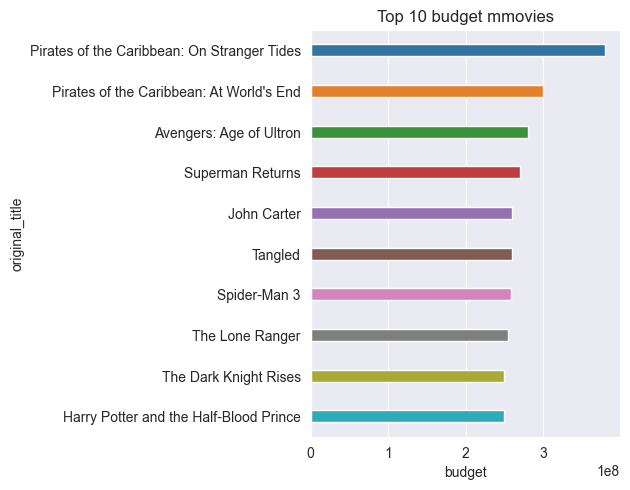

In [103]:
sns.barplot(data=top_10, y='original_title', x='budget', width=0.3)
plt.tight_layout()
plt.title('Top 10 budget mmovies')

# Revenue Analysis

## 1. Find top 10 revenue making movies

In [77]:
cur.execute('select * from movies order by revenue desc limit 10')
top10_movies = cur.fetchall()
most_revenue = pd.DataFrame(top10_movies)

In [57]:
most_revenue

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43622,Titanic,200000000,100,1997-11-18,1845034188,Titanic,7.5,7562,"84 years later, a 101-year-old woman named Ros...",Nothing on Earth could come between them.,597,4762
2,43613,The Avengers,220000000,144,2012-04-25,1519557910,The Avengers,7.4,11776,When an unexpected enemy emerges and threatens...,Some assembly required.,24428,4769
3,43625,Jurassic World,150000000,418,2015-06-09,1513528810,Jurassic World,6.5,8662,Twenty-two years after the events of Jurassic ...,The park is open.,135397,4783
4,43641,Furious 7,190000000,102,2015-04-01,1506249360,Furious 7,7.3,4176,Deckard Shaw seeks revenge against Dominic Tor...,Vengeance Hits Home,168259,4794
5,43604,Avengers: Age of Ultron,280000000,134,2015-04-22,1405403694,Avengers: Age of Ultron,7.3,6767,When Tony Stark tries to jumpstart a dormant p...,A New Age Has Come.,99861,4769
6,43721,Frozen,150000000,165,2013-11-27,1274219009,Frozen,7.3,5295,Young princess Anna of Arendelle dreams about ...,Only the act of true love will thaw a frozen h...,109445,4844
7,43628,Iron Man 3,200000000,77,2013-04-18,1215439994,Iron Man 3,6.8,8806,When Tony Stark's world is torn apart by a for...,Unleash the power behind the armor.,68721,4784
8,44143,Minions,74000000,875,2015-06-17,1156730962,Minions,6.4,4571,"Minions Stuart, Kevin and Bob are recruited by...","Before Gru, they had a history of bad bosses",211672,5045
9,43623,Captain America: Civil War,250000000,198,2016-04-27,1153304495,Captain America: Civil War,7.1,7241,"Following the events of Age of Ultron, the col...",Divided We Fall,271110,4781


Text(0.5, 23.52222222222222, 'revenue in $')

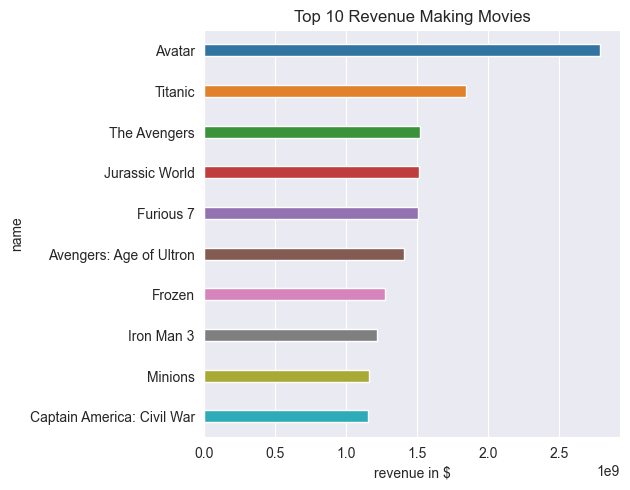

In [102]:
sns.barplot(data=most_revenue, x=5, y=1, width=0.3)
plt.tight_layout()
plt.title("Top 10 Revenue Making Movies")
plt.ylabel("name")
plt.xlabel("revenue in $")

# Voting Analysis

## 1. Find the most popular movies with highest vote_average

In [83]:
cur.execute('select * from movies order by vote_average desc limit 10')
data = cur.fetchall()
highest_vote_average = pd.DataFrame(data)

In [84]:
highest_vote_average

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,47116,Stiff Upper Lips,0,0,1998-06-12,0,Stiff Upper Lips,10.0,1,Stiff Upper Lips is a broad parody of British ...,None,89861,6332
1,47642,"Dancer, Texas Pop. 81",0,0,1998-05-01,565592,"Dancer, Texas Pop. 81",10.0,1,"Four guys, best friends, have grown up togethe...",in the middle of nowhere they had everything,78373,5463
2,47589,Sardaarji,0,0,2015-06-26,0,Sardaarji,9.5,2,A ghost hunter uses bottles to capture trouble...,None,346081,6588
3,45983,One Man's Hero,0,0,1999-08-02,0,One Man's Hero,9.3,2,One Man's Hero tells the little-known story of...,One man's hero is another man's traitor.,69848,5770
4,45478,The Shawshank Redemption,25000000,136,1994-09-23,28341469,The Shawshank Redemption,8.5,8205,Framed in the 1940s for the double murder of h...,Fear can hold you prisoner. Hope can set you f...,278,5051
5,46567,There Goes My Baby,10500000,0,1994-09-02,123509,There Goes My Baby,8.5,2,A group of high school seniors meets in the su...,None,88641,6051
6,46393,The Prisoner of Zenda,0,4,1937-09-03,0,The Prisoner of Zenda,8.4,11,An Englishman on a Ruritarian holiday must imp...,The most thrilling swordfight ever filmed...,43867,5972
7,46934,The Godfather,6000000,143,1972-03-14,245066411,The Godfather,8.4,5893,"Spanning the years 1945 to 1955, a chronicle o...",An offer you can't refuse.,238,5179
8,44259,Fight Club,63000000,146,1999-10-15,100853753,Fight Club,8.3,9413,A ticking-time-bomb insomniac and a slippery s...,Mischief. Mayhem. Soap.,550,4829
9,45415,Schindler's List,22000000,104,1993-11-29,321365567,Schindler's List,8.3,4329,The true story of how businessman Oskar Schind...,"Whoever saves one life, saves the world entire.",424,4799


Text(-113.77777777777779, 0.5, 'Name of movie')

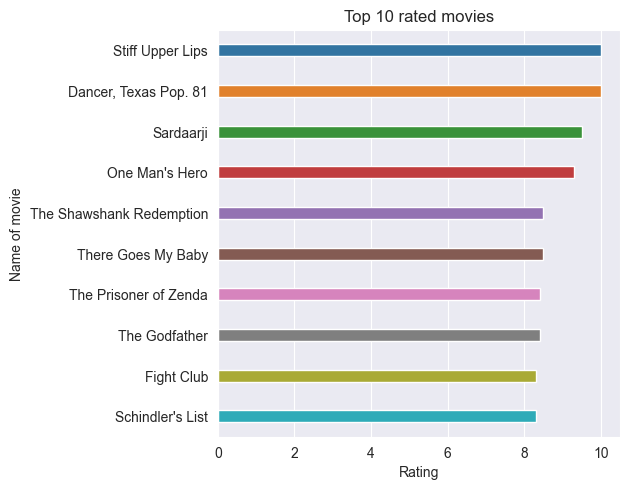

In [101]:
sns.barplot(data=highest_vote_average, x=7, y=1, width=0.3)
plt.tight_layout()
plt.title("Top 10 rated movies")
plt.xlabel("Rating")
plt.ylabel("Name of movie")

# Director Analysis

## Question- List out the director names with number of movies and revenue


In [110]:
cur.execute(
    'SELECT name, COUNT(original_title), SUM(revenue)FROM directors JOIN movies ON directors.id = movies.director_id GROUP BY name ORDER BY SUM(revenue) DESC')
mostProfitableDirector = cur.fetchall()
mostProfitableDirector = pd.DataFrame(mostProfitableDirector, columns=['director_name', 'movies', 'revenue'])
mostProfitableDirector = mostProfitableDirector.head(10)

In [112]:
mostProfitableDirector

,director_name,movies,revenue
0,Steven Spielberg,27,9147393164
1,Peter Jackson,9,6498642820
2,James Cameron,7,5883569439
3,Michael Bay,12,5832524638
4,Christopher Nolan,8,4227483234
5,Chris Columbus,11,3725631503
6,Robert Zemeckis,13,3590622002
7,George Lucas,5,3339113893
8,Tim Burton,14,3337418241
9,Ridley Scott,16,3189557997


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Steven Spielberg'),
  Text(1, 0, 'Peter Jackson'),
  Text(2, 0, 'James Cameron'),
  Text(3, 0, 'Michael Bay'),
  Text(4, 0, 'Christopher Nolan'),
  Text(5, 0, 'Chris Columbus'),
  Text(6, 0, 'Robert Zemeckis'),
  Text(7, 0, 'George Lucas'),
  Text(8, 0, 'Tim Burton'),
  Text(9, 0, 'Ridley Scott')])

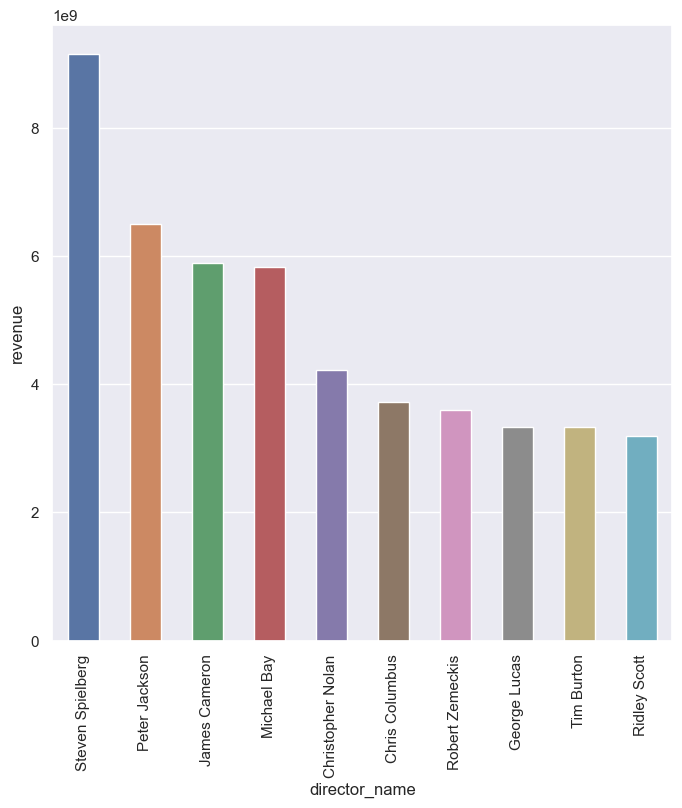

In [121]:
sns.barplot(data=mostProfitableDirector, x='director_name', y='revenue', width=0.5)
plt.xticks(rotation=90)

## Question- By doing Director analysis We know Steven Spielberg is the highest revenue, so list the Steven Spielberg movies info

In [122]:
cur.execute(
    'SELECT original_title, release_date, budget, revenue, popularity, vote_average FROM directors JOIN movies ON directors.id = movies.director_id WHERE name = "Steven Spielberg" ORDER BY release_date DESC')
moviesByStevenSpielberg = cur.fetchall()
moviesByStevenSpielberg = pd.DataFrame(moviesByStevenSpielberg,
                                       columns=['original_title', 'release_date', 'budget', 'revenue', 'popularity',
                                                'vote_average'])
moviesByStevenSpielberg

,original_title,release_date,budget,revenue,popularity,vote_average
0,The BFG,2016-06-01,140000000,183345589,44,6.0
1,Bridge of Spies,2015-10-15,40000000,165478348,48,7.2
2,Lincoln,2012-11-09,65000000,275293450,36,6.7
3,War Horse,2011-12-25,66000000,177584879,29,7.0
4,The Adventures of Tintin,2011-10-25,130000000,371940071,89,6.7
5,Indiana Jones and the Kingdom of the Crystal S...,2008-05-21,185000000,786636033,75,5.7
6,Munich,2005-12-22,70000000,130358911,29,6.9
7,War of the Worlds,2005-06-28,132000000,591739379,48,6.2
8,The Terminal,2004-06-17,60000000,219417255,57,7.0
9,Catch Me If You Can,2002-12-25,52000000,352114312,73,7.7


Text(0, 0.5, 'Name of movie')

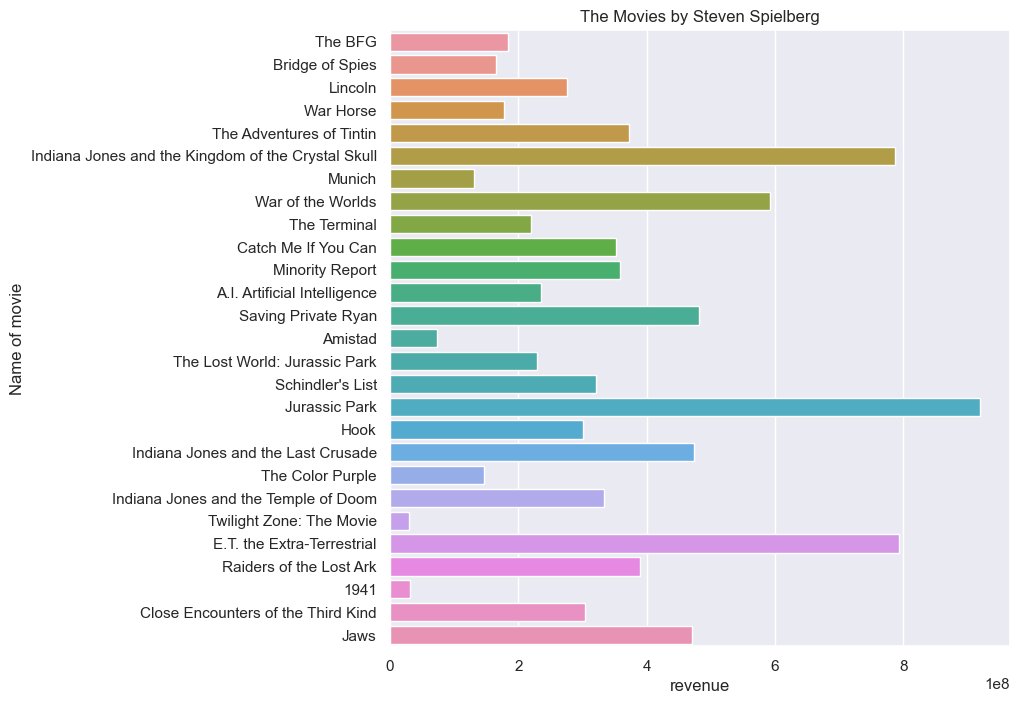

In [128]:
sns.barplot(data=moviesByStevenSpielberg, y='original_title', x='revenue')
plt.title("The Movies by Steven Spielberg")
plt.ylabel("Name of movie")